# Design of a Train Traction Motor

## Design Specifications
The specs of the traction asynchronous squirrel cage induction motor, which the design project contains, are:
- Rated Power Output: 1280 kW
- Line-to-line voltage: 1350 V
- Number of poles: 6
- Rated Speed: 1520 rpm (72 km/h) (driven with 78 Hz inverter)
- Rated Motor Torque: 7843 Nm
- Cooling: Forced Air Cooling
- Insulating Class: 200
- Train Wheel Diameter: 1210 mm
- Maximum Speed: 140 km/h
- Gear Ratio: 4.821

## Design Procedure
_In this part, explain the procedure..._

## The Output Coefficient Design Concept
In this very first part of the design process, the main purpose is to finalize the geometrical parameter design of the induction motor. 

### Emf coefficient KE
KE=0.98-0.005*p1 where p1 is the pole pair 

In [14]:
p1=3
KE=0.98-0.005*p1
print ('emf coefficient=',KE)

emf coefficient= 0.965


### Airgap apparent power

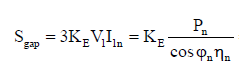

In [7]:
from IPython.display import Image
Image(filename='Images/Sgap.png')

For efficiency assumption, I will use the IEC (International Electrotechnical Commission) standarts:

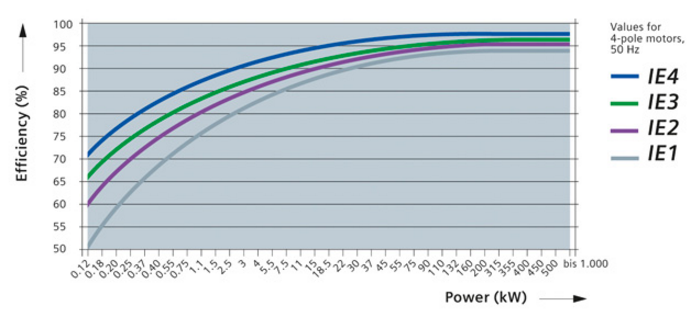

In [8]:
from IPython.display import Image
Image(filename='Images/EffvsP.png')

http://www.iec.ch/perspectives/government/sectors/electric_motors.htm referans ver!

In IEC standarts, IE1 Standard efficiency, IE2 High efficiency, IE3 Premium efficiency, IE4 Super premium efficiency. At this point, I choose 96% efficiency for premium efficiency selection.

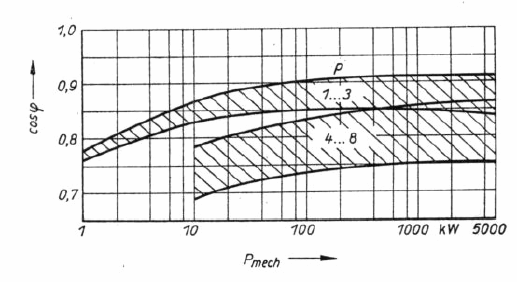

In [1]:
from IPython.display import Image
Image(filename='Images/pf.png')

For our case cosϕ = 0.92 – 0.93. Lets take pf=0.92.

In [24]:
pf=0.92
eff=0.96
Pout=1280000
Sgap=((KE*Pout)/(pf*eff))
print ('airgap apparent power=',Sgap,'VA')


airgap apparent power= 1398550.7246376812 VA


### Esson’s “constant” C0

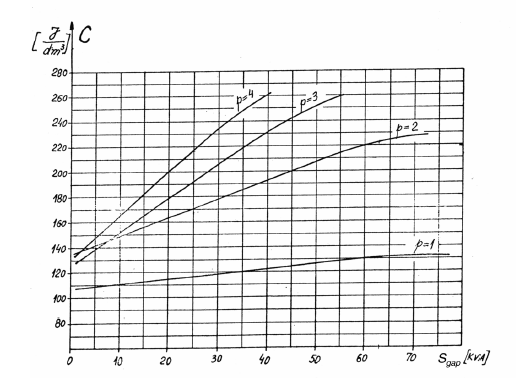

In [8]:
from IPython.display import Image
Image(filename='Images/Co.png')

From the graph, lets say Co converges to 320000J/m^3

In [22]:
Co= 320000

### Stack aspect ratio

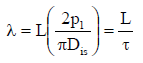

In [21]:
from IPython.display import Image
Image(filename='Images/alfa2.png')

from IPython.display import Image
Image(filename='Images/alfa.png')

In [20]:
λ = 1.6 #take it for 2p=6

### Stator main dimensions

To calculate stator main dimensions (stator bore diameter and stack length and outer diameter), we can use below equations from Ion Boldea, Syed A. Nasar Induction Machice textbook

Consider stator bore diameter first:

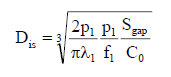

In [3]:
from IPython.display import Image
Image(filename='Images/Dis.png')

In [27]:
f=78
p1=3
Dis=((2*p1*p1*Sgap)/(3.14*λ*f*Co))**(1/3)
print ('The stator bore diameter Dis=',Dis,'m')


The stator bore diameter Dis= 0.5855340725654195 m


For stack length:

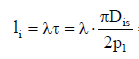

In [28]:
from IPython.display import Image
Image(filename='Images/stacklength.png')

In [29]:
l=(λ*3.14*Dis)/(2*p1)
print ('The stack length l=',l,'m')

The stack length l= 0.4902871967614446 m


Finally, lets calculate outer diameter:

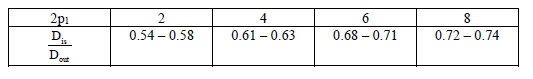

In [31]:
from IPython.display import Image
Image(filename='Images/Douter.png')

Inner/outer stator diameter ratio calls Kd which is used for Dout calculation. For our train traction motor, we can take Kd=0.7

In [32]:
Dout=Dis/0.7
print ('The stator outer diameter Dout=',Dout,'m')

The stator outer diameter Dout= 0.8364772465220278 m
